In [3]:
import numpy as np
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import animation
import ipywidgets as widgets
%matplotlib notebook

In [4]:
starlink_data = np.load("starlink_data.npy")
starlink_data = np.nan_to_num(starlink_data, nan = 0)
print(starlink_data.shape)

(1984, 8018, 10)


In [5]:
def kmeans_elbow(data: np.ndarray, num_cluster: int):
    '''
    Calculates the sum of squares for different number of clusters using K-means
    This allows to select an optimal number of cluster
    '''
    sum_squares = np.zeros(len(range(2, num_cluster+1, 2)))
    j=0
    for i in range(2, num_cluster+1, 2):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        print("Num cluster:", i, "Sum of squares:", kmeans.inertia_)
        sum_squares[j] = kmeans.inertia_
        j+=1
    
    plt.figure(figsize=(12, 7.5))
    plt.plot(np.arange(2, num_cluster+1, 2), sum_squares)
    plt.ylabel('Sum of Squares', fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 14)
    plt.show()

In [6]:

# sat_ind = np.random.choice(starlink_data.shape[0],500)
sat_ind = np.arange(0,starlink_data.shape[0])
time_ind = 1
time = starlink_data[sat_ind, ::time_ind, 0]

time = (time - 2022*10**9) *10**-6
time = time - time[:,0:1]
time[time<0] = 0


angular_momentum_x = starlink_data[sat_ind, ::time_ind, 7]
angular_momentum_y = starlink_data[sat_ind, ::time_ind, 8]
angular_momentum_z = starlink_data[sat_ind, ::time_ind, 9]

normed_angular_momentum_x = StandardScaler().fit_transform(angular_momentum_x)
normed_angular_momentum_y = StandardScaler().fit_transform(angular_momentum_y)
normed_angular_momentum_z = StandardScaler().fit_transform(angular_momentum_z)

print(time.shape)
print(normed_angular_momentum_x.shape)



(1984, 8018)
(1984, 8018)


Num cluster: 2 Sum of squares: 265428322959467.3
Num cluster: 4 Sum of squares: 124907416369652.83
Num cluster: 6 Sum of squares: 72451224655470.67
Num cluster: 8 Sum of squares: 46824165184168.51
Num cluster: 10 Sum of squares: 34993592487078.85
Num cluster: 12 Sum of squares: 27540213367981.47
Num cluster: 14 Sum of squares: 22822424072104.24
Num cluster: 16 Sum of squares: 19571920524386.938
Num cluster: 18 Sum of squares: 16845287516471.389
Num cluster: 20 Sum of squares: 15391735547252.453


<IPython.core.display.Javascript object>


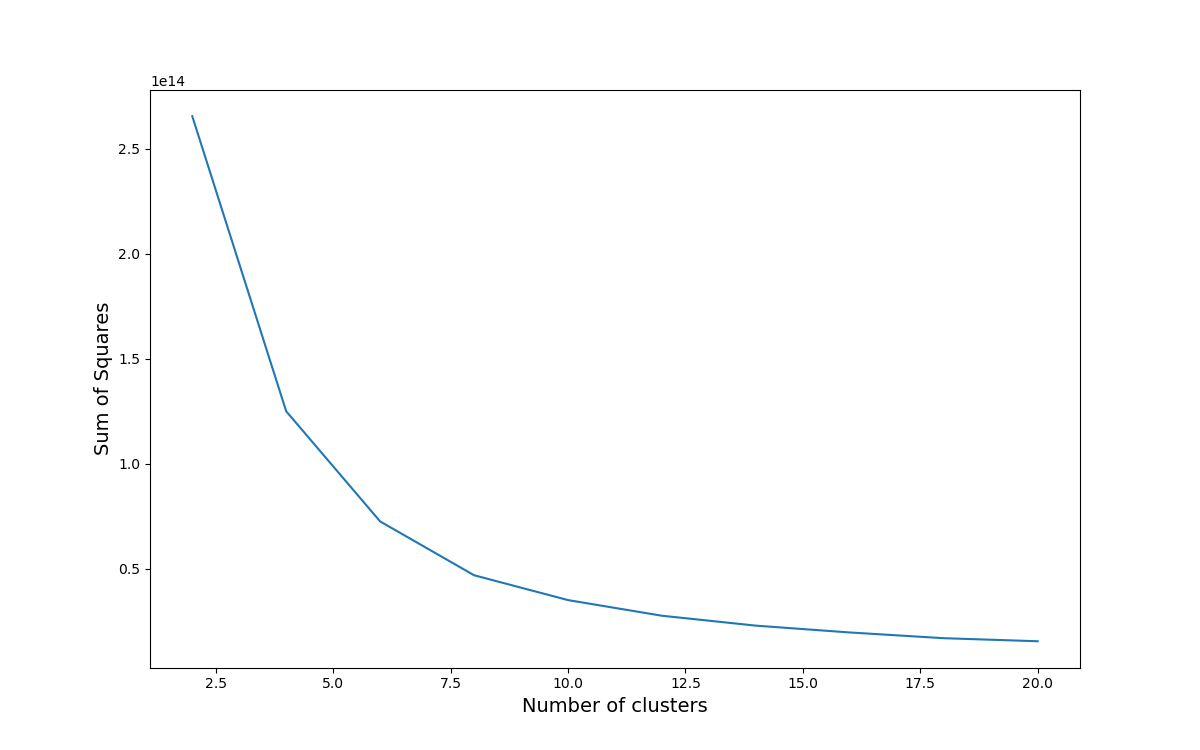

Num cluster: 2 Sum of squares: 2542847.2157046404
Num cluster: 4 Sum of squares: 1046803.0787603308
Num cluster: 6 Sum of squares: 602679.1677883377
Num cluster: 8 Sum of squares: 395053.4454035823
Num cluster: 10 Sum of squares: 303490.7907235656
Num cluster: 12 Sum of squares: 252078.6318275916
Num cluster: 14 Sum of squares: 216543.99111470513
Num cluster: 16 Sum of squares: 189210.93127383757
Num cluster: 18 Sum of squares: 168871.2959796574
Num cluster: 20 Sum of squares: 148857.12494684986


<IPython.core.display.Javascript object>


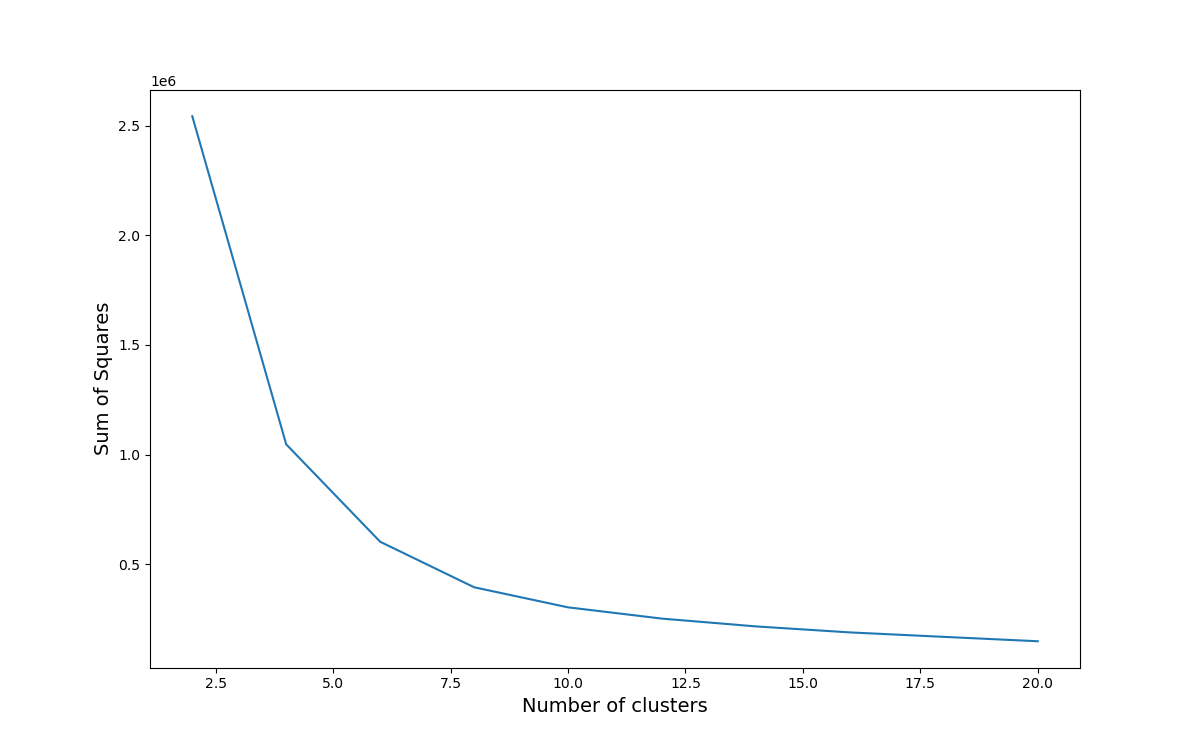

In [7]:
kmeans_elbow(np.transpose(angular_momentum_z), num_cluster=20)
kmeans_elbow(np.transpose(normed_angular_momentum_z), num_cluster=20)

In [8]:
def plot_time_clusters(cluster: np.ndarray, num_clusters: int, 
            angular_momentum_x: np.ndarray,
            angular_momentum_y: np.ndarray,
            angular_momentum_z: np.ndarray,
            time: np.ndarray, axis: int):
    fig = plt.figure(figsize= (15,15))
    fig, axs =plt.subplots(3,1, sharex= True)
    for i in range(0,num_clusters):
        title = "cluster" + str(i)
        if axis == 0:
            time_tmp = time[cluster == i]
            angular_momentum_x_tmp = angular_momentum_x[cluster == i]
            angular_momentum_y_tmp = angular_momentum_y[cluster == i]
            angular_momentum_z_tmp = angular_momentum_z[cluster == i]
            ind  = np.dstack(np.random.choice(time_tmp.shape[0],1))#,np.arange(0,time.shape[1])])
        elif axis == 1:
            time_tmp = time[:,cluster == i]
            angular_momentum_x_tmp = angular_momentum_x[:,cluster == i]
            angular_momentum_y_tmp = angular_momentum_y[:,cluster == i]
            angular_momentum_z_tmp = angular_momentum_z[:,cluster == i]
            # ind  = np.random.choice(time.shape[0],5)
            ind = np.arange(0,time_tmp.shape[0],100)
        axs[0].scatter(time_tmp[ind,:],angular_momentum_x_tmp[ind,:])
        axs[0].set_ylabel('h_x')
        axs[1].scatter(time_tmp[ind,:],angular_momentum_y_tmp[ind,:])
        axs[1].set_ylabel('h_y')
        axs[2].scatter(time_tmp[ind,:],angular_momentum_z_tmp[ind,:],label = title)
        axs[2].set_ylabel('h_z')
        axs[2].legend()

In [16]:
def plot_clusters_3d( time_point: int, 
    clusters: np.ndarray, num_clusters: int,           
            angular_momentum_x: np.ndarray,
            angular_momentum_y: np.ndarray,
            angular_momentum_z: np.ndarray,  axis: int):
    
    plt.cla()
    if axis == 0:
        for i in range(0,num_clusters):
            title = "Cluster" + str(i)
            # ind  = np.arange(0,angular_momentum_x[clusters == i].shape[1],100)
            ind = time_point
            ax.scatter(angular_momentum_x[clusters == i][:,ind],
                       angular_momentum_y[clusters == i][:,ind],
                       angular_momentum_z[clusters == i][:,ind], s = 20 , label = title)
    elif axis == 1:
        for i in range(0,num_clusters):
            title = "Cluster" + str(i)
            ind  = np.arange(0,angular_momentum_x[:,clusters == i].shape[0],100)
            ax.scatter(angular_momentum_x[:,clusters == i][ind],
                       angular_momentum_y[:,clusters == i][ind],
                       angular_momentum_z[:,clusters == i][ind], s = 40 , label = title)
    ax.set_xlabel('h_x')
    ax.set_ylabel('h_y')
    ax.set_zlabel('h_z')
    ax.set_xlim([-50000, 50000])
    ax.set_ylim([-50000, 50000])
    ax.set_zlim([0, 32000])
    ax.legend()

In [10]:
kmeans = KMeans(n_clusters=7, random_state=0)
x_clusters = kmeans.fit_predict(angular_momentum_x)
y_clusters = kmeans.fit_predict(angular_momentum_y)
z_clusters = kmeans.fit_predict(angular_momentum_z)



<IPython.core.display.Javascript object>


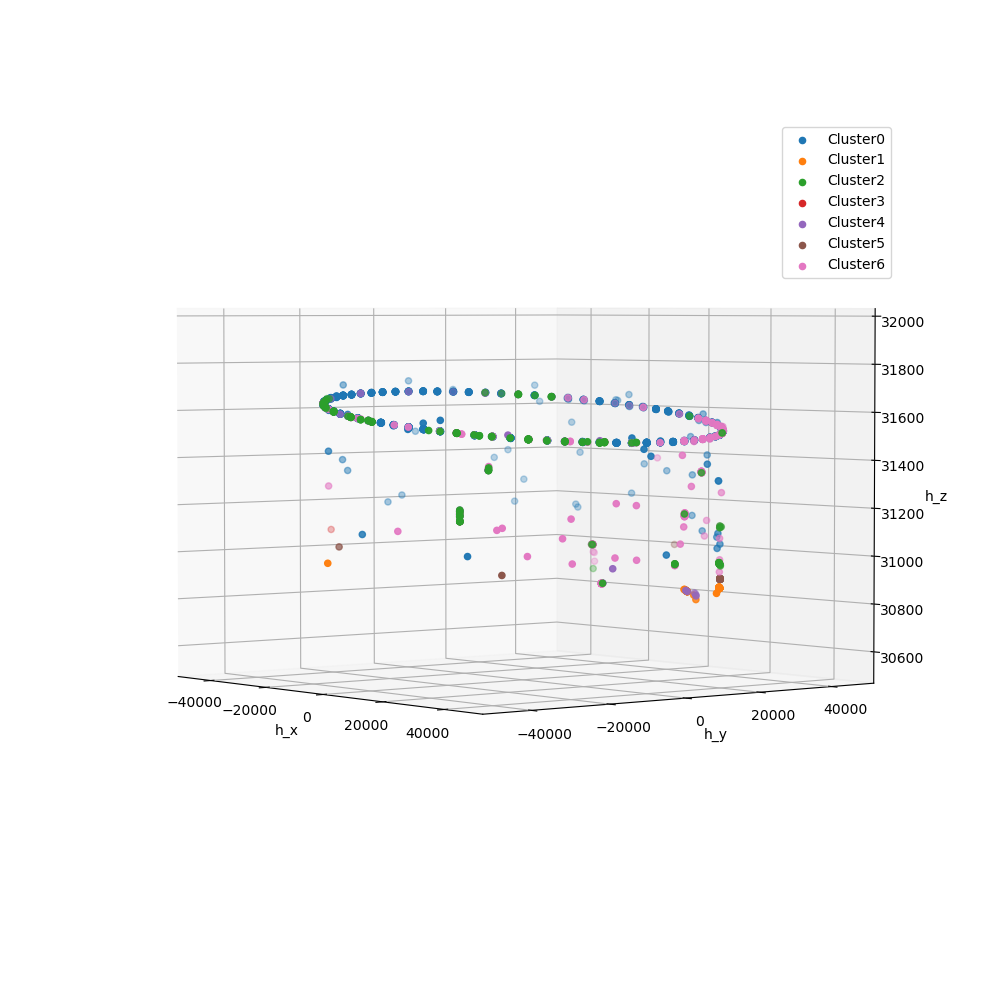

In [11]:
fig1 = plt.figure(figsize = (10,10))
ax = fig1.add_subplot(111, projection='3d')
plot_clusters_3d(0,z_clusters,7,angular_momentum_x,angular_momentum_y,angular_momentum_z,0)
plt.ion()
plt.show()


335


<IPython.core.display.Javascript object>


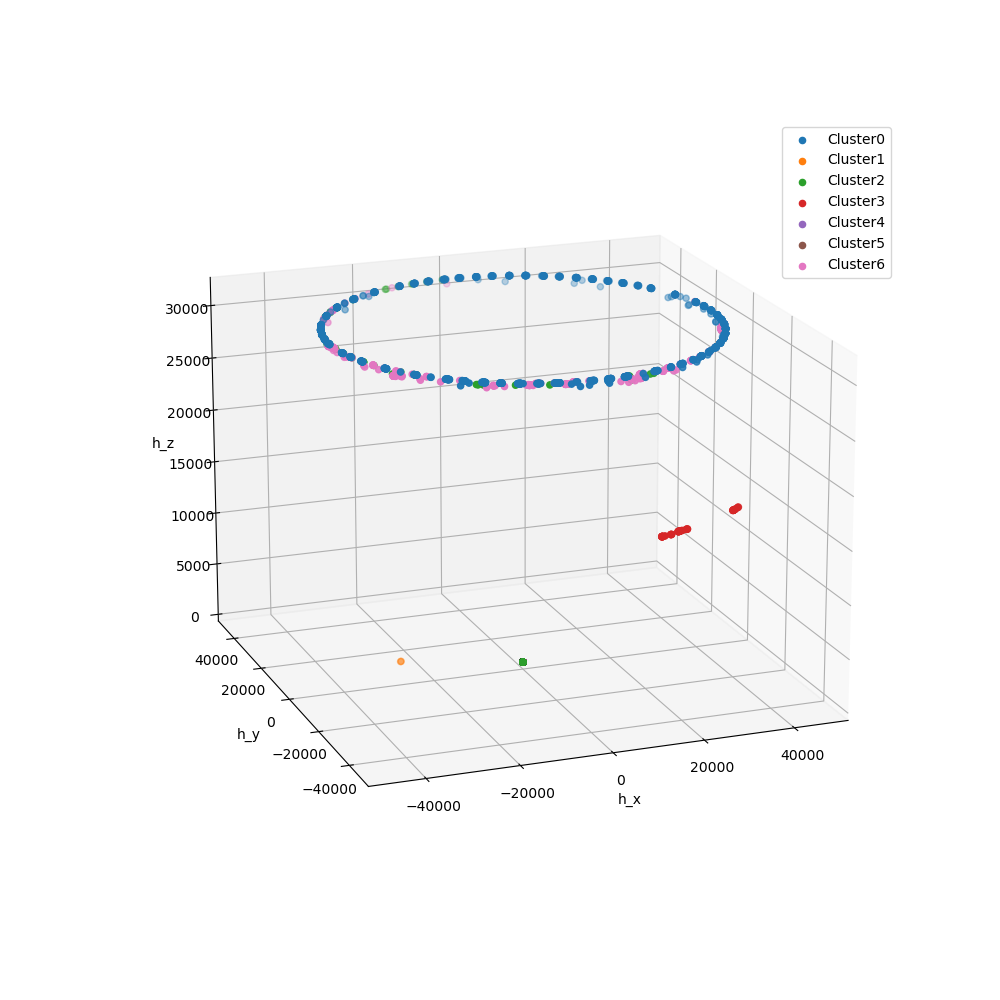

In [17]:
plt.close()

print(time[:,::24].shape[1])
ts_fig = plt.figure(figsize = (10, 10))
ax = ts_fig.add_subplot(111, projection='3d')

anim = animation.FuncAnimation(ts_fig, 
                                plot_clusters_3d, 
                                frames=time[:,::24].shape[1], 
                                interval=20, 
                                fargs=(z_clusters,7,angular_momentum_x[:,::24],
                                                    angular_momentum_y[:,::24],
                                                    angular_momentum_z[:,::24],0),
                                blit=True,
                                repeat_delay=200)

plt.show()

In [18]:
np.save('h_z_clusters.npy',z_clusters)

In [ ]:
plt.close()


plot_time_clusters(x_clusters, 8, angular_momentum_x,angular_momentum_y,angular_momentum_z, time, 0)

In [ ]:
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111, projection='3d')
plot_clusters_3d(0,y_clusters,8,angular_momentum_x,angular_momentum_y,angular_momentum_z,0,ax2)
plt.ion()
plt.show()

plot_time_clusters(y_clusters, 8, angular_momentum_x,angular_momentum_y,angular_momentum_z, time, 0)

In [ ]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111, projection='3d')
plot_clusters_3d(0,z_clusters,8,angular_momentum_x,angular_momentum_y,angular_momentum_z,0,ax3)
plt.ion()
plt.show()

plot_time_clusters(z_clusters, 8, angular_momentum_x,angular_momentum_y,angular_momentum_z, time, 0)

In [ ]:
x_clusters = kmeans.fit_predict(np.transpose(angular_momentum_x))
y_clusters = kmeans.fit_predict(np.transpose(angular_momentum_y))
z_clusters = kmeans.fit_predict(np.transpose(angular_momentum_z))


plot_clusters_3d(0,x_clusters,8,angular_momentum_x,angular_momentum_y,angular_momentum_z,1)
plot_time_clusters(x_clusters, 8, angular_momentum_x,angular_momentum_y,angular_momentum_z, time, 1)

plot_clusters_3d(0,y_clusters,8,angular_momentum_x,angular_momentum_y,angular_momentum_z,1)
plot_time_clusters(y_clusters, 8, angular_momentum_x,angular_momentum_y,angular_momentum_z, time, 1)

plot_clusters_3d(0,z_clusters,8,angular_momentum_x,angular_momentum_y,angular_momentum_z,1)
plot_time_clusters(z_clusters, 8, angular_momentum_x,angular_momentum_y,angular_momentum_z, time, 1)

In [ ]:
# PLOT RADIUS AS A FUNCTION OF TIME
# PLOT AVERAGE OF  EACH CLUSTER


In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(angular_momentum_x[0,:],angular_momentum_y[0,:],angular_momentum_z[0,:], s = 40 )
ax.set_xlabel('h_x')
ax.set_ylabel('h_y')
ax.set_zlabel('h_z')
plt.show()

In [ ]:
kmeans_elbow(np.transpose(normed_angular_momentum_x), num_cluster=20)
kmeans_elbow(np.transpose(normed_angular_momentum_y), num_cluster=20)
kmeans_elbow(np.transpose(normed_angular_momentum_z), num_cluster=20)


In [ ]:
radius = np.linalg.norm(starlink_data[:, :, 1:4], axis=2)
print(radius.shape)

kmeans_elbow(radius, num_cluster=20)

In [ ]:
optics = OPTICS()
optics.fit(normed_angular_momentum_x)
print(len(np.unique(optics.labels_)))
optics.fit(normed_angular_momentum_y)
print(len(np.unique(optics.labels_)))
optics.fit(normed_angular_momentum_z)
print(len(np.unique(optics.labels_)))
